In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import qickdawg as qd
from scipy.optimize import curve_fit
from pprint import pprint

qd.start_client('128.252.134.24')

min_step_us = qd.soccfg.cycles2us(1) # this is the minimum step size in us, which is the time for one clock cycle
min_step_ns = min_step_us*1e3
max_int_time_us = min_step_us * (2**16 - 1)
max_int_time_ns = min_step_ns * (2**16 - 1)
max_internal_reps = 160

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 

In [18]:
config = copy(qd.NVConfiguration())


config.adc_channel = 0
config.laser_gate_pmod = 0
config.mw_nqz = 1
config.mw_channel = 0

config.relax_delay_tns = 5 # between each rep, wait for everything to catch up, mostly aom
config.readout_integration_tus = max_int_time_us
config.mw_init_treg = qd.soccfg.us2cycles(0)

config.mw_gain = 30000
config.pre_init = True
config.reps = 5
config.reads_per_freq = 10
config.add_linear_sweep('mw', 'fMHz', start=2750, stop=3000, delta=1)


prog = qd.LockinODMRalt(config)

# Configuring settings 
config_pl = copy(config)

config_pl.reps = 500 

In [21]:
prog = qd.LockinODMRalt(config)
d = prog.acquire(progress=True)

  0%|          | 0/12550 [00:00<?, ?it/s]

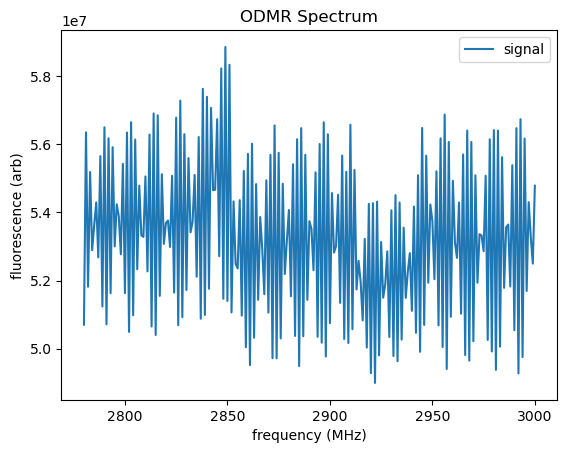

In [22]:
plt.plot(d.frequencies[30::], -d.odmr[30::] , label='signal')

plt.title('ODMR Spectrum')
plt.ylabel('fluorescence (arb)')
plt.xlabel('frequency (MHz)')
plt.legend()

plt.show()

In [12]:
print(prog.time_per_rep())

nan


In [3]:
qd.laser_on(config)

-127.87843137254902

In [4]:
qd.laser_off(config)

-127.86367589837491